In [30]:
import itertools
import pathlib
import sys

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import networkx as nx
import numpy as np

sys.path.insert(0, str(pathlib.PurePath('..')))
from linear_geodesic_optimization.graph import boundary

In [31]:
rng = np.random.default_rng()

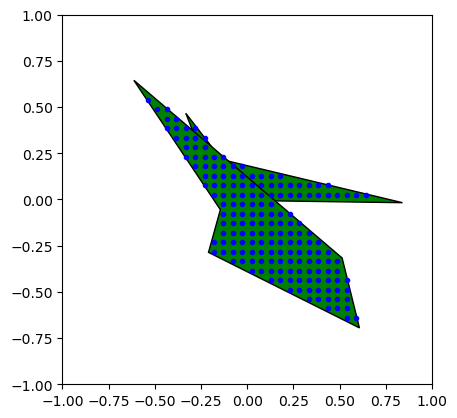

In [32]:
# Test polygon interiors

polygons = [[
    np.array([r * np.cos(theta), r * np.sin(theta)])
    for theta in sorted(rng.random(5) * 2 * np.pi)
    for r in (rng.random(),)
] for _ in range(2)]

fig, ax = plt.subplots()

for polygon in polygons:
    ax.add_patch(Polygon(
        polygon,
        facecolor = 'g',
        edgecolor='k'
    ))

for x in np.linspace(-1., 1., 40):
    for y in np.linspace(-1., 1., 40):
        if boundary.is_in_interior_of_polygons(
            np.array([x, y]),
            polygons
        ):
            ax.plot(x, y, 'b.')

ax.set_xbound(-1., 1.)
ax.set_ybound(-1., 1.)
ax.set_aspect('equal')
plt.show()

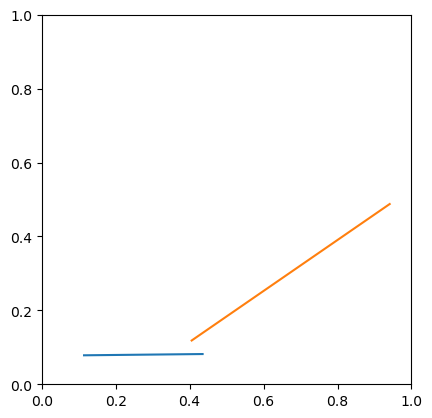

In [33]:
# Test segment intersection

left1 = rng.random(2)
right1 = rng.random(2)
left2 = rng.random(2)
right2 = rng.random(2)

alpha = boundary.compute_segment_segment_intersection(
    left1, right1, left2, right2
)
intersection = left1 + alpha * (right1 - left1) if alpha is not None else None

fig, ax = plt.subplots()
ax.plot([left1[0], right1[0]], [left1[1], right1[1]])
ax.plot([left2[0], right2[0]], [left2[1], right2[1]])
if intersection is not None:
    ax.plot(intersection[0], intersection[1], 'g.')

ax.set_xbound(0., 1.)
ax.set_ybound(0., 1.)
ax.set_aspect('equal')
plt.show()

True


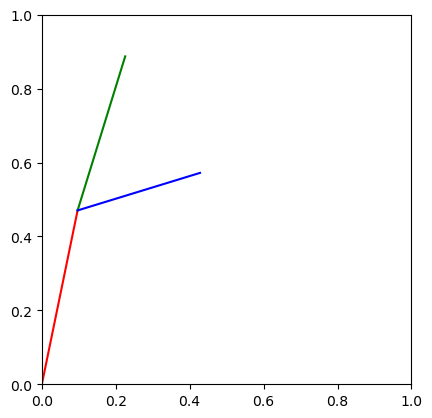

In [34]:
# Test turn detection
u = rng.random(2) / 2
v = rng.random(2) / 2
w = rng.random(2) / 2

u = np.array(u)
v = np.array(v)
w = np.array(w)

print(boundary.is_on_right_side_of_turn(u, v, w))

fig, ax = plt.subplots()
plt.plot([0., u[0]], [0., u[1]], 'r')
plt.plot([u[0], u[0] + v[0]], [u[1], u[1] + v[1]], 'g')
plt.plot([u[0], u[0] + w[0]], [u[1], u[1] + w[1]], 'b')
ax.set_xbound(0., 1.)
ax.set_ybound(0., 1.)
ax.set_aspect('equal')
plt.show()

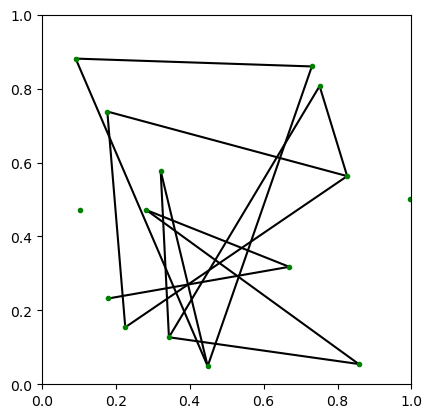

In [35]:
rng = np.random.default_rng()

vertices = [
    rng.random(2)
    for _ in range(15)
]
p = 0.1
edges = [
    (i, j)
    for i in range(len(vertices))
    for j in range(i + 1, len(vertices))
    if rng.choice([True, False], p=[p, 1 - p])
]
rng.shuffle(edges)

fig, ax = plt.subplots(1, 1)
for i, j in edges:
    ax.plot([vertices[i][0], vertices[j][0]], [vertices[i][1], vertices[j][1]], 'k-')
for vertex in vertices:
    ax.plot([vertex[0]], [vertex[1]], 'g.')

ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
ax.set_aspect('equal')

In [36]:
border = boundary.compute_border(vertices, edges)

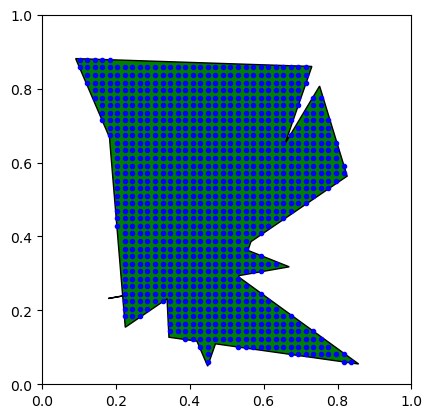

In [37]:
polygons = border

fig, ax = plt.subplots()

for polygon in polygons:
    ax.add_patch(Polygon(
        polygon,
        facecolor = 'g',
        edgecolor='k'
    ))

for x in np.linspace(0., 1., 50):
    for y in np.linspace(0., 1., 50):
        if boundary.is_in_interior_of_polygons(
            np.array([x, y]),
            polygons
        ):
            ax.plot(x, y, 'b.')

ax.set_xbound(0., 1.)
ax.set_ybound(0., 1.)
ax.set_aspect('equal')
plt.show()

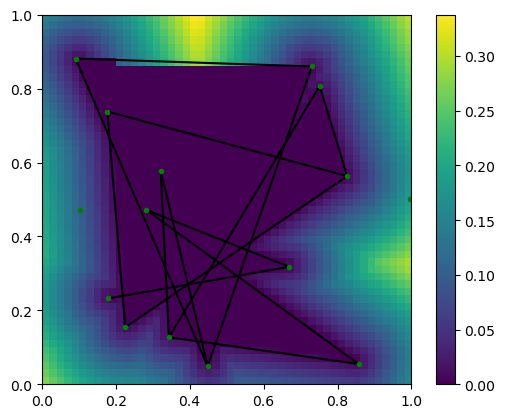

In [38]:
fig, ax = plt.subplots(1, 1)
heatmap_data = np.array([
    [
        boundary.distance_to_border(np.array([x, y]), border)
        for x in np.linspace(0., 1., 50)
    ]
    for y in np.linspace(0., 1., 50)
])

im = ax.imshow(
    heatmap_data,
    origin='lower',
    extent=(0., 1., 0., 1.)
)
fig.colorbar(im)

for i, j in edges:
    ax.plot([vertices[i][0], vertices[j][0]], [vertices[i][1], vertices[j][1]], 'k-')
for vertex in vertices:
    ax.plot([vertex[0]], [vertex[1]], 'g.')

ax.set_aspect('equal')

plt.show()